<a href="https://colab.research.google.com/github/HariNithyaRao/DL/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sklearn Approach**

#Regression using House Price datset

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [84]:
dataset = pd.read_csv("/content/House Price India.csv")
print(dataset.head())  # Print the first few rows of the dataset
print(dataset.info())  # 

           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [85]:
#dataset preprocessing
columns_to_drop = ['id', 'Date', 'Postal Code','Lattitude','Longitude']

# Drop the specified columns from the dataset
dataset = dataset.drop(columns_to_drop, axis=1)

In [86]:
X = dataset.drop('Price', axis=1)  # Features (input variables)
y = dataset['Price']  # Target variable


In [87]:
#Split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ONLY LINEAR REGRESSION

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [89]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 45193913652.022736


In [90]:
import math
k=np.array(y_test)
diff=abs(k-y_pred).round(2)
(min(diff)+max(diff))//2


1163278.0

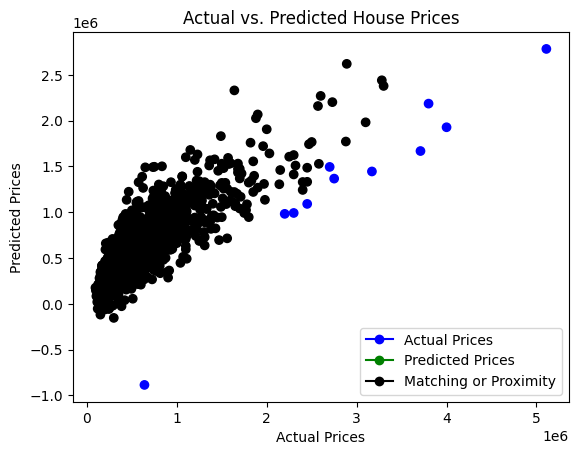

In [91]:
# Calculate the absolute difference between actual and predicted prices
k=np.array(y_test)
diff=abs(k-y_pred).round(2)
t=(min(diff)+max(diff))//2#print(diff[0:1])

# Set the color based on the threshold for matching or proximity
color = np.where(diff <=t, 'black', np.where(y_test < y_pred, 'green', 'blue'))

# Create the scatter plot
plt.scatter(y_test, y_pred, c=color)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.legend(handles=[
    plt.Line2D([], [], marker='o', color='blue', label='Actual Prices'),
    plt.Line2D([], [], marker='o', color='green', label='Predicted Prices'),
    plt.Line2D([], [], marker='o', color='black', label='Matching or Proximity'),
])

plt.show()


#MULTIPLE REGRESSION MODELS AND THEIR PERFORMANCE ANALYSIS

#Initializing the models


In [92]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']


In [93]:
models[0],models[1],models[2]

(LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor())

## Training and evaluating the mse scores

In [94]:
mse_scores = []
y_pred=[]
for i in range(3):
    models[i].fit(X_train, y_train)
    y_pred .append(models[i].predict(X_test))
    mse = mean_squared_error(y_test, y_pred[i])
    mse_scores.append(mse)
mse_scores

[45193913652.022736, 74188873471.10329, 34649323505.324104]

##Visualizing the performance of models through plots

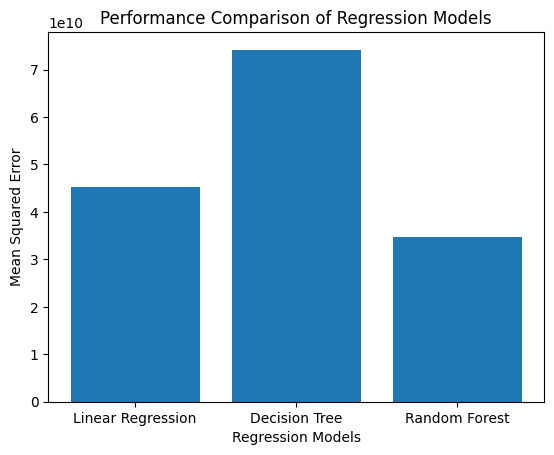

In [95]:
plt.bar(model_names, mse_scores)
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.title('Performance Comparison of Regression Models')
plt.show()


#Visualizing the predictions of three Models

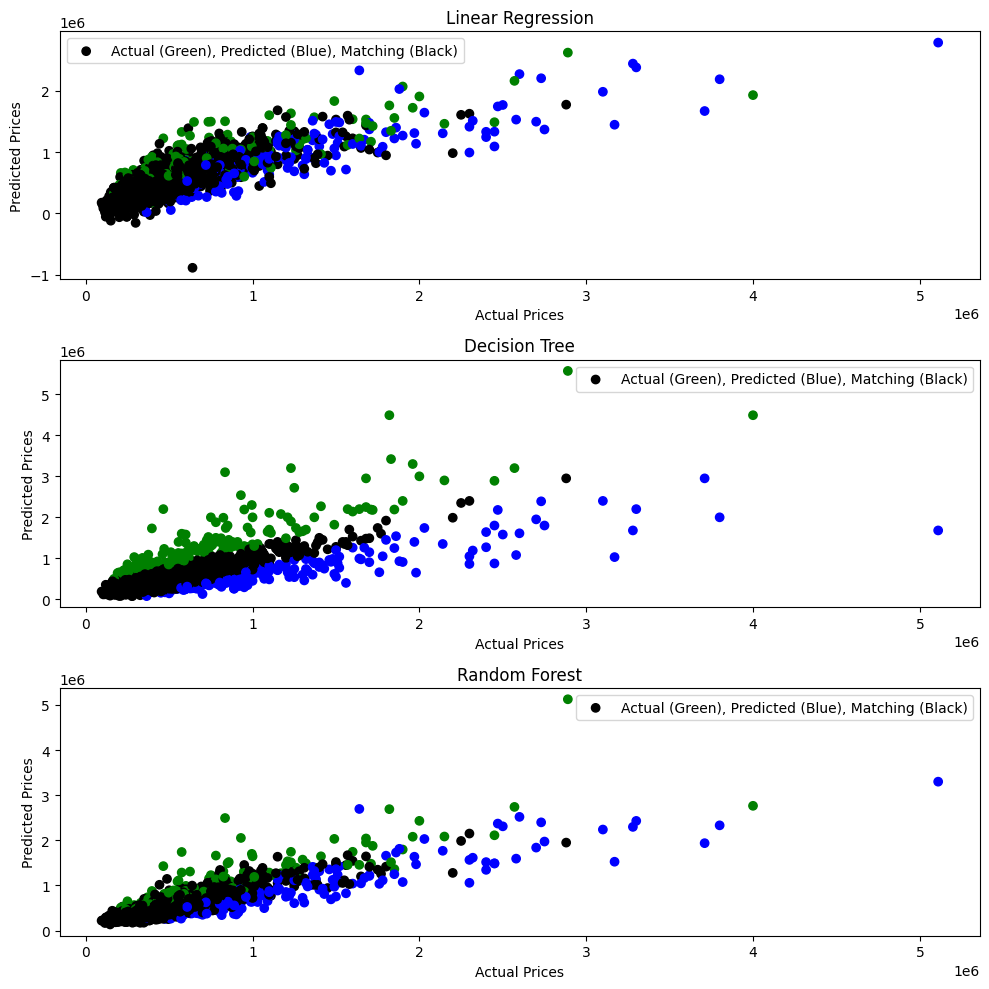

In [96]:
# The difference between actual and predicted prices
diff_model1 = np.abs(y_test - y_pred[0]).round(2)
diff_model2 = np.abs(y_test - y_pred[1]).round(2)
diff_model3 = np.abs(y_test - y_pred[2]).round(2)

# Taking average of min and max as theshold (min(diff)+max(diff))//2
threshold_model1=996678.0 
threshold_model2=285000.0
threshold_model3=980063.0

# Set the colors based on the thresholds for each model
color_model1 = np.where(diff_model1 < threshold_model1, 'black', np.where(y_test < y_pred[0], 'green', 'blue'))
color_model2 = np.where(diff_model2 < threshold_model2, 'black', np.where(y_test < y_pred[1], 'green', 'blue'))
color_model3 = np.where(diff_model3 < threshold_model3, 'black', np.where(y_test < y_pred[2], 'green', 'blue'))


# Create separate subplots for each model
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# Iterate over each model and create scatter plots
for i, ax in enumerate(axs):
  ax.scatter(y_test, y_pred[i], c=color_model2, label='Actual (Green), Predicted (Blue), Matching (Black)')
  ax.set_xlabel('Actual Prices')
  ax.set_ylabel('Predicted Prices')
  ax.set_title(f'{model_names[i]}')
  ax.legend()
  # Remove the "le6" text from the plot axis labels
  #ax.get_xaxis().get_major_formatter().set_scientific(False)
  #ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show()

# Pytorch Approach

In [97]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [98]:
# Load the CSV file
dataset = pd.read_csv('/content/House Price India.csv')

# dataset preprocessing
columns_to_drop = ['id', 'Date', 'Postal Code','Lattitude','Longitude']

# Drop the specified columns from the dataset
dataset = dataset.drop(columns_to_drop, axis=1)

X = dataset.drop('Price', axis=1).values  # Features (input variables)
y = dataset['Price'].values  # Target variable


In [99]:
#Split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [102]:
# Define the model architecture
model = nn.Linear(X_train.shape[1], 1)

In [103]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [104]:
# Set the number of training epochs
max_epochs = 10000

# Training loop
for epoch in range(max_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Early stopping condition based on validation loss
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        if val_loss < 1e-5:
            print(f'Early stopping at epoch {epoch+1}')
            break

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)

y_pred = y_pred_tensor.numpy().flatten()

# Calculate the mean absolute error
mae = np.abs(y_test - y_pred).mean()
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 543515.387660872


In [105]:
print(y_pred,y_test)

[-43.279606    3.4203067 -42.11188   ... 105.205605  -81.49295
  26.854385 ] [ 235000  552000  615000 ... 1010000  265000  675000]


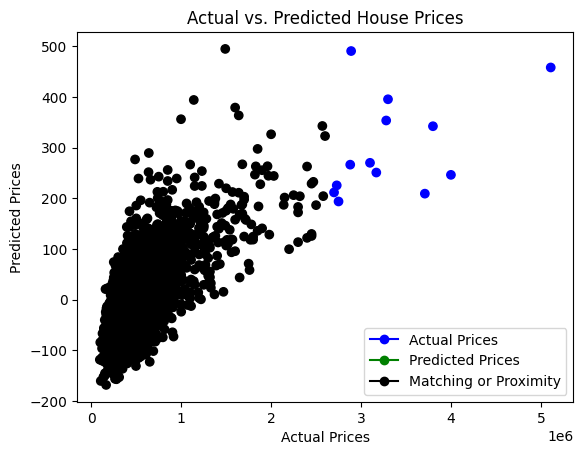

In [106]:
import matplotlib.pyplot as plt
# Calculate the absolute difference between actual and predicted prices
k=np.array(y_test)
diff=abs(k-y_pred).round(2)
t=(min(diff)+max(diff))//2#print(diff[0:1])

# Set the color based on the threshold for matching or proximity
color = np.where(diff <=t, 'black', np.where(y_test < y_pred, 'green', 'blue'))

# Create the scatter plot
plt.scatter(y_test, y_pred, c=color)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.legend(handles=[
    plt.Line2D([], [], marker='o', color='blue', label='Actual Prices'),
    plt.Line2D([], [], marker='o', color='green', label='Predicted Prices'),
    plt.Line2D([], [], marker='o', color='black', label='Matching or Proximity'),
])

plt.show()

#Tensorflow Approach

In [107]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [108]:
#dataset preprocessing
dataset = pd.read_csv("/content/House Price India.csv")

columns_to_drop = ['id', 'Date', 'Postal Code','Lattitude','Longitude']

# Drop the specified columns from the dataset
dataset = dataset.drop(columns_to_drop, axis=1)

In [109]:
X = dataset.drop('Price', axis=1)  # Features (input variables)
y = dataset['Price']  # Target variable

In [110]:
#Split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])


In [113]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [114]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 422110134272.0000
Epoch 2/100
366/366 [==============================] - 1s 3ms/step - loss: 410493616128.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 371551502336.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 307067420672.0000
Epoch 5/100
366/366 [==============================] - 1s 3ms/step - loss: 232329920512.0000
Epoch 6/100
366/366 [==============================] - 1s 3ms/step - loss: 169901998080.0000
Epoch 7/100
366/366 [==============================] - 1s 3ms/step - loss: 129656102912.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 108401123328.0000
Epoch 9/100
366/366 [==============================] - 1s 2ms/step - loss: 96850010112.0000
Epoch 10/100
366/366 [==============================] - 1s 2ms/step - loss: 88966692864.0000
Epoch 11/100
366/366 [==============================] - 1s 2ms/step - l

In [115]:
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error:", loss)


92/92 [==============================] - 0s 2ms/step - loss: 37535653888.0000
Mean Squared Error: 37535653888.0


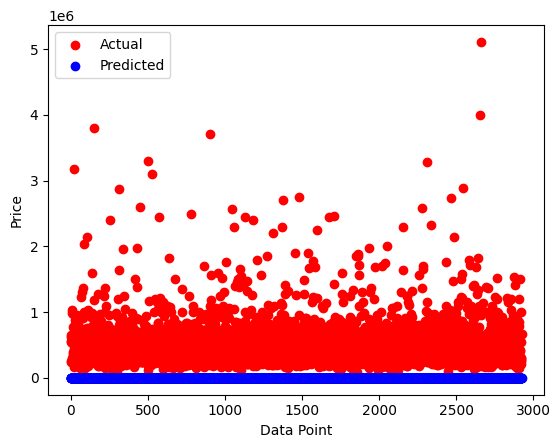

In [116]:
# Plotting y_test in red
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual')

# Plotting y_pred in blue
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted')

# Add labels and legend
plt.xlabel('Data Point')
plt.ylabel('Price')
plt.legend()

# Display the plot
plt.show()

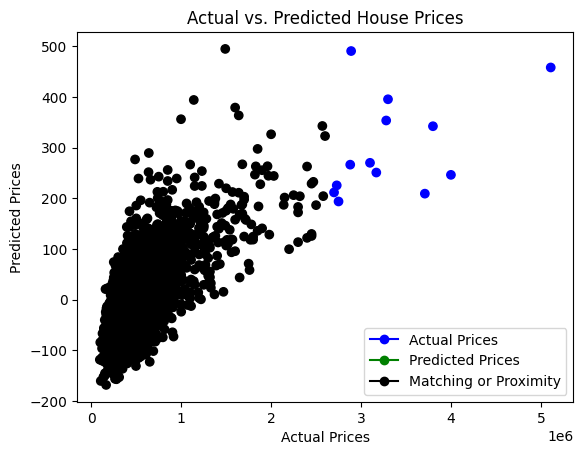

In [117]:
# Calculate the absolute difference between actual and predicted prices
k=np.array(y_test)
diff=abs(k-y_pred).round(2)
t=(min(diff)+max(diff))//2#print(diff[0:1])

# Set the color based on the threshold for matching or proximity
color = np.where(diff <=t, 'black', np.where(y_test < y_pred, 'green', 'blue'))

# Create the scatter plot
plt.scatter(y_test, y_pred, c=color)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.legend(handles=[
    plt.Line2D([], [], marker='o', color='blue', label='Actual Prices'),
    plt.Line2D([], [], marker='o', color='green', label='Predicted Prices'),
    plt.Line2D([], [], marker='o', color='black', label='Matching or Proximity'),
])

plt.show()